# Final Team Project: Marketing Strategy Evaluation for New Menu Item
---

## Description:

This project aims to evaluate the effectiveness of three different marketing campaigns for a new menu item introduced by a fast-food chain. Using A/B testing, we will determine which promotion has the greatest impact on sales across various market locations. Our analysis will involve data cleaning, pre-processing, exploratory data analysis (EDA), and the application of data science methods using Python to derive actionable insights.

---

In [56]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

## Importing Required Libraries and Data Pre-Processing

In [57]:
import pandas as pd
#from ydata_profiling import ProfileReport
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


#df.profile_report()

In [58]:
# Importing dataset
url = "https://raw.githubusercontent.com/gerardcf1/ADS-505/refs/heads/main/WA_Marketing-Campaign.csv"
df = pd.read_csv(url, index_col='MarketID')
df.head()

,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
MarketID,,,,,,
1,Medium,1,4,3,1,33.73
1,Medium,1,4,3,2,35.67
1,Medium,1,4,3,3,29.03
1,Medium,1,4,3,4,39.25
1,Medium,2,5,2,1,27.81


In [59]:
#Analyse the dataframe's shape, datatype, and null/missing values
print("----------Shape----------")
print(df.shape)
print("----------Data Types----------")
print(df.dtypes)
print("----------Null Values----------")
print(df.isnull().sum())

----------Shape----------
(548, 6)
----------Data Types----------
MarketSize           object
LocationID            int64
AgeOfStore            int64
Promotion             int64
week                  int64
SalesInThousands    float64
dtype: object
----------Null Values----------
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64


The data set contains 548 records with 6 variables including the target variable promotion. There are no missing values or null values to evaluate, further analysis will be required to transform marketsize into a numeric value.

In [60]:
#analyze quantitative values through descriptive statistics and distribution
df.describe()

,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000
mean,479.656934,8.503650,2.029197,2.500000,53.466204
std,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,17.340000
25%,216.000000,4.000000,1.000000,1.750000,42.545000
50%,504.000000,7.000000,2.000000,2.500000,50.200000
75%,708.000000,12.000000,3.000000,3.250000,60.477500
max,920.000000,28.000000,3.000000,4.000000,99.650000


The average sales across all promotions is about $50,000, as part of our modeling we will aim to determine which promotion is predicted to result in more sales than the other. The independent variables used for our predictive modeling will be location, age of the store, the week the promotion ran, and the sales.

## Exploratory Data Analysis (EDA)

<Axes: xlabel='Promotion'>

Text(0.5, 0, 'Promotion')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Distribution of Promotions')

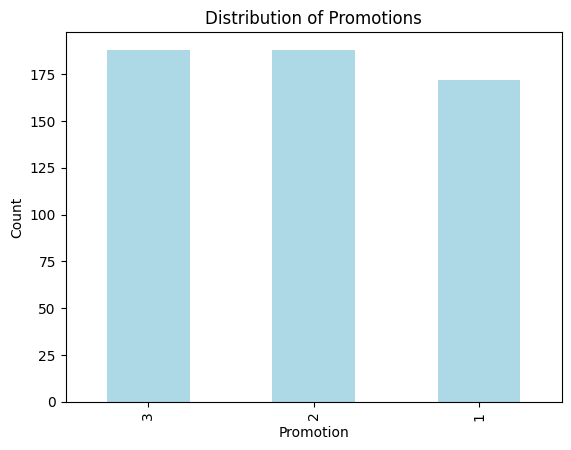

In [61]:
# Barplot of dependent variable, promotion
df['Promotion'].value_counts().plot(kind='bar', color='lightblue')
plt.xlabel('Promotion')
plt.ylabel('Count')
plt.title('Distribution of Promotions')
plt.show()

The 3 promotions is relatively distributed in the dataset, therefore minimal sampling strategies will be required when training and testing models.

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Promotion', ylabel='SalesInThousands'>

Text(0.5, 0, 'Promotion')

Text(0, 0.5, 'Sales in Thousands')

Text(0.5, 1.0, 'Sales Distribution by Promotion')

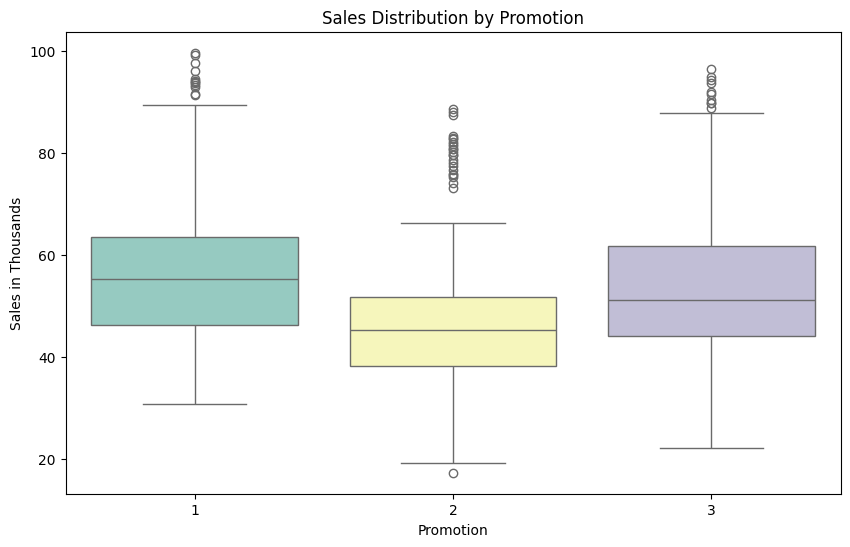

In [62]:
# Create a box plot of Sales by Promotion, highlighting outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promotion', y='SalesInThousands', data=df, showfliers=True, palette='Set3', hue='Promotion', legend=False)
plt.xlabel('Promotion')
plt.ylabel('Sales in Thousands')
plt.title('Sales Distribution by Promotion')
plt.show()


When comparing the distribution of sales by promotion, promotion 2 performed lower on average.  Promotion 1 and promotion 3 have similar distribution in sales. Since this is a small dataset we will include all records in the model.

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Promotion', ylabel='SalesInThousands'>

Text(0.5, 0, 'Promotion')

Text(0, 0.5, 'Sales in Thousands')

Text(0.5, 1.0, 'Sales by Promotion and Market Size')

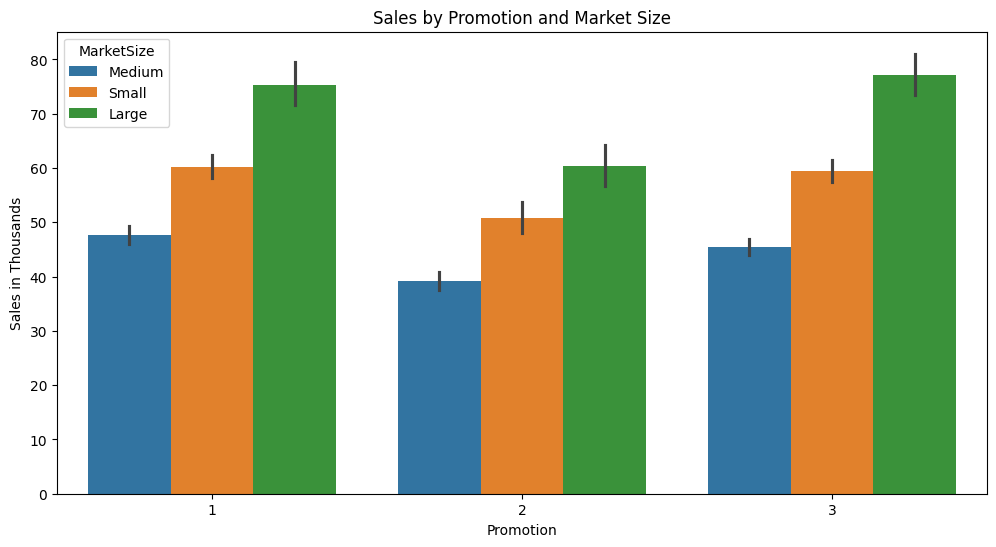

In [63]:
# Create a bar chart of Sales by Promotion and Market Size
plt.figure(figsize=(12, 6))
sns.barplot(x='Promotion', y='SalesInThousands', hue='MarketSize', data=df)
plt.xlabel('Promotion')
plt.ylabel('Sales in Thousands')
plt.title('Sales by Promotion and Market Size')
plt.show()

In [67]:
#preprocess data to create dummy variables for categorical data
X = df[['MarketSize','LocationID','AgeOfStore','Promotion','week']]
y = df['SalesInThousands']
X = pd.get_dummies(X, columns=['MarketSize','LocationID','AgeOfStore','Promotion','week'], drop_first=True)
X = X.astype(int)

X.head()

,MarketSize_Medium,MarketSize_Small,LocationID_2,LocationID_3,LocationID_4,LocationID_5,LocationID_6,LocationID_7,LocationID_8,LocationID_9,...,AgeOfStore_23,AgeOfStore_24,AgeOfStore_25,AgeOfStore_27,AgeOfStore_28,Promotion_2,Promotion_3,week_2,week_3,week_4
MarketID,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Modeling

In [83]:
#Split data to training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)
acc_lir = round(lr_model.score(X_test, y_test) * 100, 2)

print("Linear Regression:")
print(f"Mean Squared Error: {lr_mse}")
print(f"R-squared: {lr_r2}")
print(f'Linear Regression Accuracy: {acc_lir}%')


LinearRegression()

Linear Regression:
Mean Squared Error: 1.2408068849687587e+27
R-squared: -4.220540371192464e+24
Linear Regression Accuracy: -4.220540371192464e+26%


In [84]:
# Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)
acc_dt = round(dt_model.score(X_test, y_test) * 100, 2)

print("\nDecision Tree:")
print(f"Mean Squared Error: {dt_mse}")
print(f"R-squared: {dt_r2}")
print(f'Decision Tree Accuracy: {acc_dt}%')


DecisionTreeRegressor(random_state=42)


Decision Tree:
Mean Squared Error: 49.86615818181818
R-squared: 0.8303828449759674
Decision Tree Accuracy: 83.04%


In [85]:
# Random Forest Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
acc_rf = round(rf_model.score(X_test, y_test) * 100, 2)

print("\nRandom Forest:")
print(f"Mean Squared Error: {rf_mse}")
print(f"R-squared: {rf_r2}")
print(f'Random Forest Accuracy: {acc_rf}%')


RandomForestRegressor(random_state=42)


Random Forest:
Mean Squared Error: 41.64787493263642
R-squared: 0.8583369099116561
Random Forest Accuracy: 85.83%


Based on the performance of the linear regression, decision tree, and random forest models, the random forest model outperformed the others in accuracy and r-squared values.